In [19]:
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST

In [20]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5)])
train_data = FashionMNIST(root = './Data', download=True, train=True, transform=transform)
print('Size of Train Data = ', len(train_data))
test_data = FashionMNIST(root = './Data', download=True, train=False, transform=transform)
print('Size of Test Data = ', len(test_data))

Size of Train Data =  60000
Size of Test Data =  10000


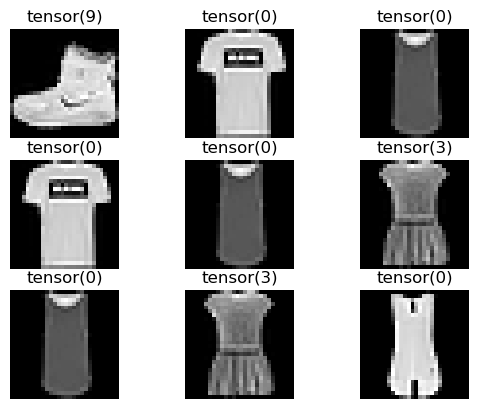

In [21]:
fig, ax = plt.subplots(nrows = 3, ncols = 3)
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(train_data.data[i+j], cmap='gray')
        ax[i,j].set_title(train_data.targets[i+j])
        ax[i, j].axis('off')
plt.show()
